In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv("insurance.csv")
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [3]:
df.shape

(1338, 7)

In [4]:
df.isnull().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

In [5]:
df.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


## feature engg

In [10]:
Male = pd.get_dummies(df["sex"],drop_first=True,dtype = "int")

In [13]:
df = pd.concat([df,Male], axis=1)

In [14]:
df

,age,sex,bmi,children,smoker,region,charges,male
0,19,female,27.900,0,yes,southwest,16884.92400,0
1,18,male,33.770,1,no,southeast,1725.55230,1
2,28,male,33.000,3,no,southeast,4449.46200,1
3,33,male,22.705,0,no,northwest,21984.47061,1
4,32,male,28.880,0,no,northwest,3866.85520,1
...,...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830,1
1334,18,female,31.920,0,no,northeast,2205.98080,0
1335,18,female,36.850,0,no,southeast,1629.83350,0
1336,21,female,25.800,0,no,southwest,2007.94500,0


In [24]:
smoker = pd.get_dummies(df["smoker"],drop_first=True,dtype = "int")
df = pd.concat([df,smoker], axis=1)
df = df.rename(columns={"yes":"is_smoker"})

In [25]:
df

,age,sex,bmi,children,smoker,region,charges,male,is_smoker
0,19,female,27.900,0,yes,southwest,16884.92400,0,1
1,18,male,33.770,1,no,southeast,1725.55230,1,0
2,28,male,33.000,3,no,southeast,4449.46200,1,0
3,33,male,22.705,0,no,northwest,21984.47061,1,0
4,32,male,28.880,0,no,northwest,3866.85520,1,0
...,...,...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830,1,0
1334,18,female,31.920,0,no,northeast,2205.98080,0,0
1335,18,female,36.850,0,no,southeast,1629.83350,0,0
1336,21,female,25.800,0,no,southwest,2007.94500,0,0


In [27]:
df["region"].unique()

array(['southwest', 'southeast', 'northwest', 'northeast'], dtype=object)

Explatory Analysis

<Axes: xlabel='sex', ylabel='count'>

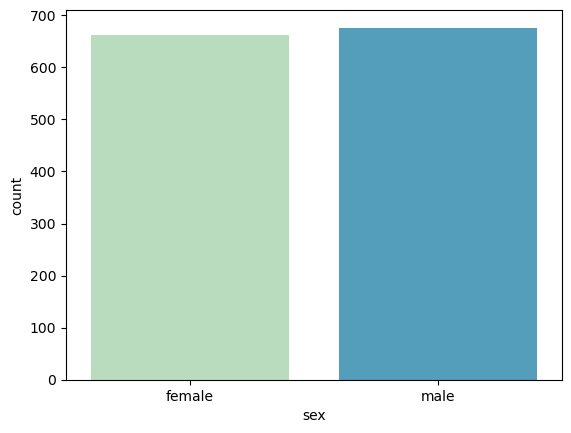

In [31]:
sns.countplot(x = "sex", data = df, palette= "GnBu")

In [30]:
df["sex"].value_counts()

sex
male      676
female    662
Name: count, dtype: int64

<Axes: xlabel='sex', ylabel='charges'>

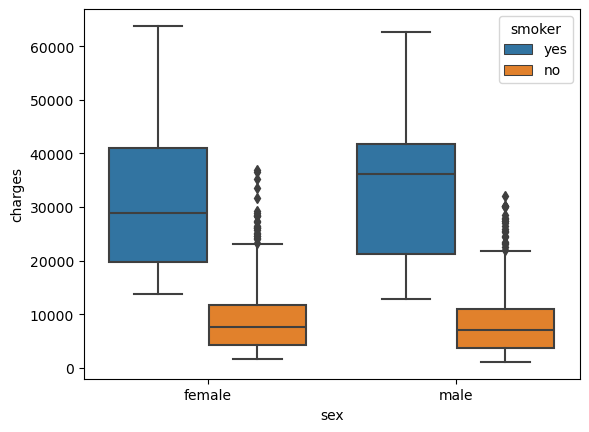

In [37]:
sns.boxplot(x="sex",y = "charges", data = df, hue = "smoker")

<Axes: xlabel='age', ylabel='charges'>

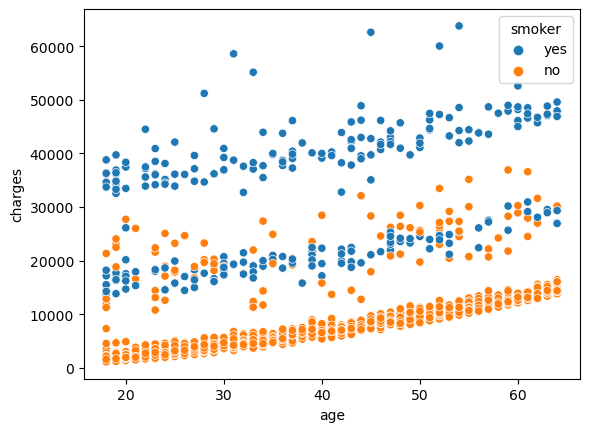

In [40]:
sns.scatterplot(x = "age", y = "charges", data = df,hue = "smoker")

<Axes: xlabel='bmi', ylabel='charges'>

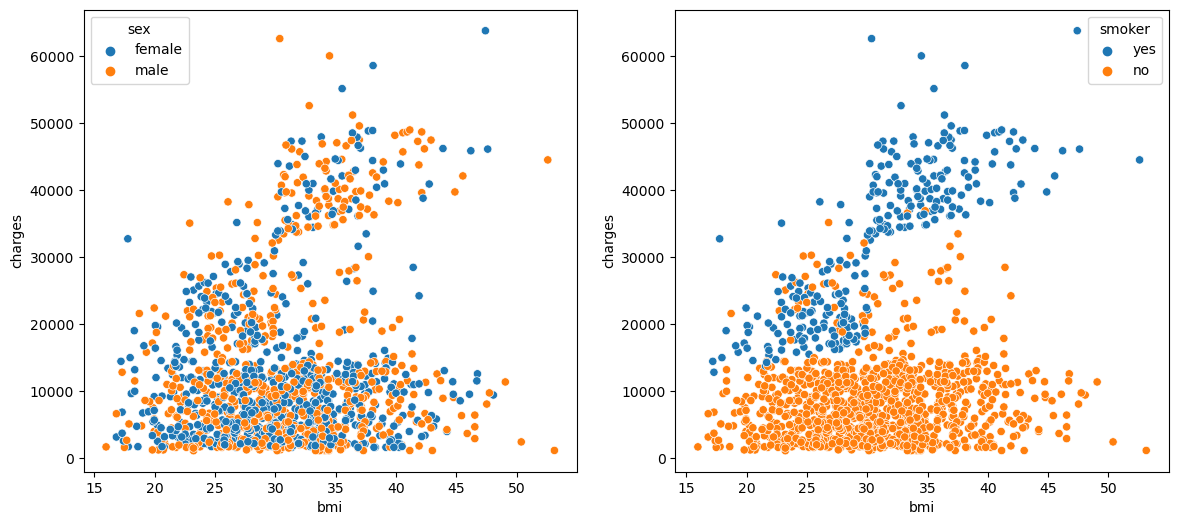

In [44]:
fig,ax = plt.subplots(nrows=1,ncols=2,figsize = (14,6))
sns.scatterplot(x = "bmi",y = "charges", data = df, hue = "sex",ax = ax[0])
sns.scatterplot(x = "bmi",y = "charges", data = df, hue = "smoker", ax = ax[1])

In [45]:
df.head()

,age,sex,bmi,children,smoker,region,charges,male,is_smoker
0,19,female,27.900,0,yes,southwest,16884.92400,0,1
1,18,male,33.770,1,no,southeast,1725.55230,1,0
2,28,male,33.000,3,no,southeast,4449.46200,1,0
3,33,male,22.705,0,no,northwest,21984.47061,1,0
4,32,male,28.880,0,no,northwest,3866.85520,1,0


In [46]:
regions = pd.get_dummies(df["region"],dtype = "int")
df = pd.concat([df,regions], axis=1)
df.head()

,age,sex,bmi,children,smoker,region,charges,male,is_smoker,northeast,northwest,southeast,southwest
0,19,female,27.900,0,yes,southwest,16884.92400,0,1,0,0,0,1
1,18,male,33.770,1,no,southeast,1725.55230,1,0,0,0,1,0
2,28,male,33.000,3,no,southeast,4449.46200,1,0,0,0,1,0
3,33,male,22.705,0,no,northwest,21984.47061,1,0,0,1,0,0
4,32,male,28.880,0,no,northwest,3866.85520,1,0,0,1,0,0


In [47]:
df.drop(["sex","smoker","region"],axis = 1,inplace = True)

In [48]:
df.head()

,age,bmi,children,charges,male,is_smoker,northeast,northwest,southeast,southwest
0,19,27.900,0,16884.92400,0,1,0,0,0,1
1,18,33.770,1,1725.55230,1,0,0,0,1,0
2,28,33.000,3,4449.46200,1,0,0,0,1,0
3,33,22.705,0,21984.47061,1,0,0,1,0,0
4,32,28.880,0,3866.85520,1,0,0,1,0,0


<Axes: >

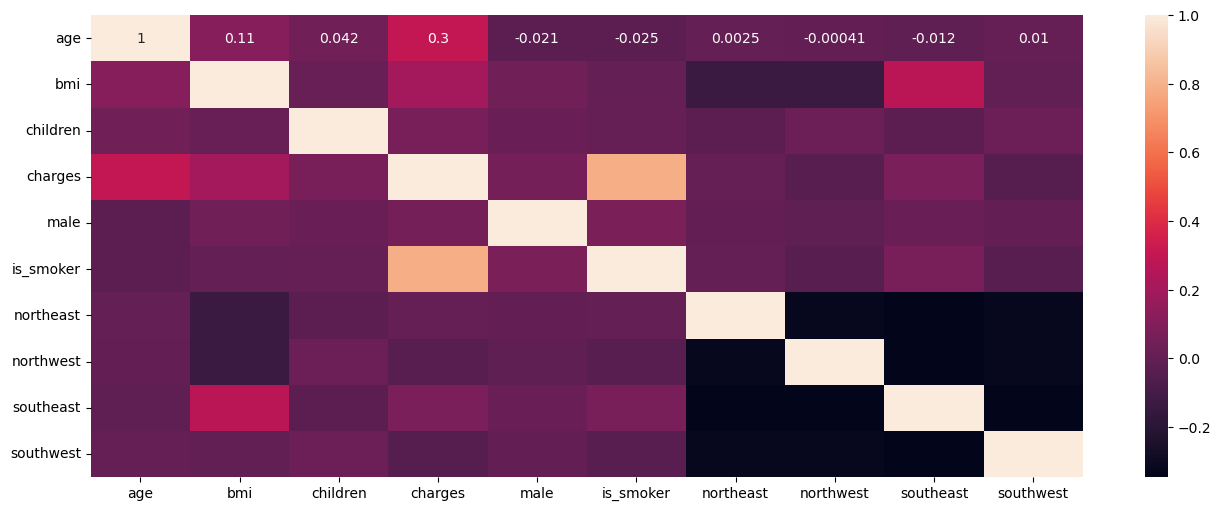

In [50]:
plt.figure(figsize = (16,6))
sns.heatmap(df.corr(), annot=True)

## splitting the data

In [51]:
x = df.drop("charges",axis = 1)
y = df["charges"]

In [52]:
x.head()

,age,bmi,children,male,is_smoker,northeast,northwest,southeast,southwest
0,19,27.900,0,0,1,0,0,0,1
1,18,33.770,1,1,0,0,0,1,0
2,28,33.000,3,1,0,0,0,1,0
3,33,22.705,0,1,0,0,1,0,0
4,32,28.880,0,1,0,0,1,0,0


In [54]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size = 0.4)

In [55]:
x_train.shape

(802, 9)

In [56]:
x_test.shape

(536, 9)

## scaling the data

In [57]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

In [63]:
scaled_x_train = scaler.fit_transform(x_train)
scaled_x_test = scaler.transform(x_test)

## support vector regression model

In [59]:
from sklearn.svm import SVR

In [64]:
regressor = SVR()
regressor.fit(scaled_x_train,y_train)

SVR()

In [65]:
predict = regressor.predict(scaled_x_test)

In [66]:
predict.shape

(536,)

In [67]:
predict[:10]

array([9476.38489563, 9481.44742313, 9494.40647933, 9431.11917538,
       9473.27027613, 9462.75716362, 9484.04467711, 9453.81401216,
       9458.19697365, 9484.05409795])

In [68]:
y_test[:10]

698     10976.24575
1172    11093.62290
283     11879.10405
784      4350.51440
162     10450.55200
1245     5615.36900
286      9432.92530
1260     4544.23480
151      7789.63500
335     13822.80300
Name: charges, dtype: float64